# یک سیستم ساده

اگر از درس شیمی به خاطر داشته باشید، با استفاده از ساختار لوویس می‌توانستیم الکترون‌ها و پیوندهای مولکول‌ها را نشان دهیم. اما بعضی مولکول‌ها بودند که چند ساختار لوویس داشتند که به اصطلاح به آن‌ها رزونانس می‌گفتیم. برای مثال بنزن یا آمونیاک که هر دو ساختارهای دو حالته داشتند. در شکل زیر ساختارهای ممکن بنزن را می‌بینیم.

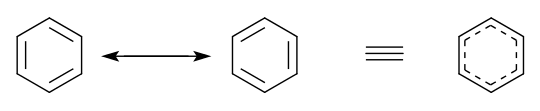

پس برای توصیف مولکول بنزن، باید از یک سیستم دو حالته استفاده کنیم. پس دوبردار پایه این فضا را تعریف می‌کنیم: به ساختار لوویس اول بردار
$\vert 0 \rangle = \begin{pmatrix}
1\\0
\end{pmatrix}$
و به ساختار دوم بردار
$\vert 1 \rangle = \begin{pmatrix}
0\\1
\end{pmatrix}$
را نسبت می‌دهیم. سیستم را می‌توانیم با هامیلتونی زیر که یک ماتریس هرمیتی است توصیف کنیم.
$$\hat{H} = \begin{pmatrix}
E_0 & -\Delta \\-\Delta & E_0
\end{pmatrix}$$

درایه‌های قطری به این معنی هستند که اگر هر یک از ساختارها را به تنهایی داشتیم هر کدام انرژی
$E_0$ 
داشتند. و درایه‌های غیر قطری $-\Delta$ برای این هستند که این دو ساختار بتوانند با احتمالی غیر صفر به یکدیگر تبدیل شوند. 
1. ماتریس هامیلتونی بالا را قطری کنید و ویژه‌بردارها و ویژه‌مقدارهای آن را به دست آورید.

حالا می‌خواهیم تحول این سیستم را بررسی کنیم. بنابراین از معادله شرودینگر استفاده می‌کنیم.
$$i \hbar \frac{d}{dt} \vert \psi(t) \rangle = \hat{H} \vert \psi(t) \rangle$$
تابع موج در زمان‌های مختلف را می‌توانیم برحسب بردارهای پایه فضا بسط دهیم.
$$\vert \psi(t) \rangle = c_0(t) \vert 0 \rangle + c_1(t) \vert 1 \rangle = \begin{pmatrix} c_0(t) \\ c_1(t) \end{pmatrix}$$
بنابراین مسئله تبدیل می‌شود به پیدا کردن تحولات ضرایب $c_0 (t)$ و $c_1 (t)$. با قرار دادن تابع موج برحسب این ضرایب در معادله شرودینگر دو معادله دیفرانسیل خطی خواهیم داشت.

2. این دو معادله دیفرانسیل را به دست آورید و با تغییر متغییر آنها را به صورت زیر بازنویسی کنید.
$$i \hbar \frac{d(c_0 + c_1)}{dt} = (E_0 - \Delta) (c_0 + c_1)$$
$$i \hbar \frac{d(c_0 - c_1)}{dt} = (E_0 + \Delta) (c_0 - c_1)$$
3. 	معادلات بالا را حل کنید و ضرایب $c_0 (t)$ و $c_1 (t)$ را به دست آورید. می‌توانید این معادلات را به صورت عددی حل کنید. 

4. نشان دهید که در زمان‌های مختلف، احتمال اینکه بنزن در ساختار اول و دوم باشد برابر است با $\vert c_0(t) \vert^2$ و $\vert c_1(t) \vert^2$. از روی جواب قسمت قبل نمودار این احتمالات برحسب زمان را رسم کنید. 
5. با استفاده از جواب بخش قبل ساختار رزونانسی بنزن را توصیف کنید.

حالا می‌خواهیم این جواب‌ها را از روش دیگری به دست آوریم.

6. از جواب های بخش اول استفاده کنید و معادله شرودینگر را در پایه ویژه‌بردارهای ماتریس هامیلتونی بنویسید. یعنی بجای اینکه $\vert \psi(t) \rangle$ را در پایه $\vert 0 \rangle$ و $\vert 1 \rangle$ بنویسم، در پایه‌ای که در بخش یک بدست آوردیم بنویسیم.
7. تحولات ویژه‌بردارهای هامیلتونی را با استفاده از معادله بخش قبل به دست آورید. مشاهده کنید که مشابه جواب‌های بخش ۳ می‌شود.

## آماده‌سازی‌ها

In [63]:
import numpy as np
import matplotlib.pylab as plt

In [64]:
# use for finding eigenvalue and eigenvectors
from numpy import linalg as LA

In [65]:
def dagger(x : str):
    return np.mat(x).conj().T
# e.g. dagger(np.mat([1 + 1j,0,0]))

In [ ]:
# calculate e^matrix
from scipy.linalg import expm

In [66]:
#part 3
def evolution(H,initial,T):
    N = 1000
    delta_t = T / N
    hbar = 1
    psi = initial
    psi_t = psi
    c_0 = complex_rand(N)
    c_1 = complex_rand(N)
    for i in range(N):
        psi_t = np.matmul(expm(-1j * delta_t * H ) , psi) # psi(t) = e^{-itH} psi_0
        psi = psi_t
        c_0[i] = psi_t[0]
        c_1[i] = psi_t[1]
    return psi_t,c_0,c_1